In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#use seaborn plotting style defaults
import seaborn as sns; sns.set()
#from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from scipy.stats import beta
from scipy.stats import f
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

data = pd.read_csv('/content/BreastTissue.csv', index_col=0)
print(data.head())

Saving BreastTissue.csv to BreastTissue.csv
               I0     PA500       HFS          DA          Area       A/DA  \
class                                                                        
1      524.794072  0.187448  0.032114  228.800228   6843.598481  29.910803   
1      330.000000  0.226893  0.265290  121.154201   3163.239472  26.109202   
1      551.879287  0.232478  0.063530  264.804935  11888.391830  44.894903   
1      380.000000  0.240855  0.286234  137.640111   5402.171180  39.248524   
1      362.831266  0.200713  0.244346  124.912559   3290.462446  26.342127   

          Max IP          DR           P  
class                                     
1      60.204880  220.737212  556.828334  
1      69.717361   99.084964  400.225776  
1      77.793297  253.785300  656.769449  
1      88.758446  105.198568  493.701814  
1      69.389389  103.866552  424.796503  


In [20]:
# !pip install scikit-learn==0.23.2
!pip3 install pycaret==2.3.6
!pip install pycaret[analysis]
!pip install shap
#from pycaret.utils import enable_colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached spacy-2.3.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem w

In [21]:
#!pip install schemdraw<0.16
from pycaret.utils import *
from pycaret.classification import *

version()
clf = setup(data=df, target="class", train_size=0.7, session_id=123)


,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5"
4,Original data shape,"(106, 10)"
5,Transformed data shape,"(106, 10)"
6,Transformed train set shape,"(74, 10)"
7,Transformed test set shape,"(32, 10)"
8,Numeric features,9
9,Preprocess,True


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv('BreastTissue.csv')
df.head(5)

,class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,1,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,1,551.879287,0.232478,0.063530,264.804935,11888.391830,44.894903,77.793297,253.785300,656.769449
3,1,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,1,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


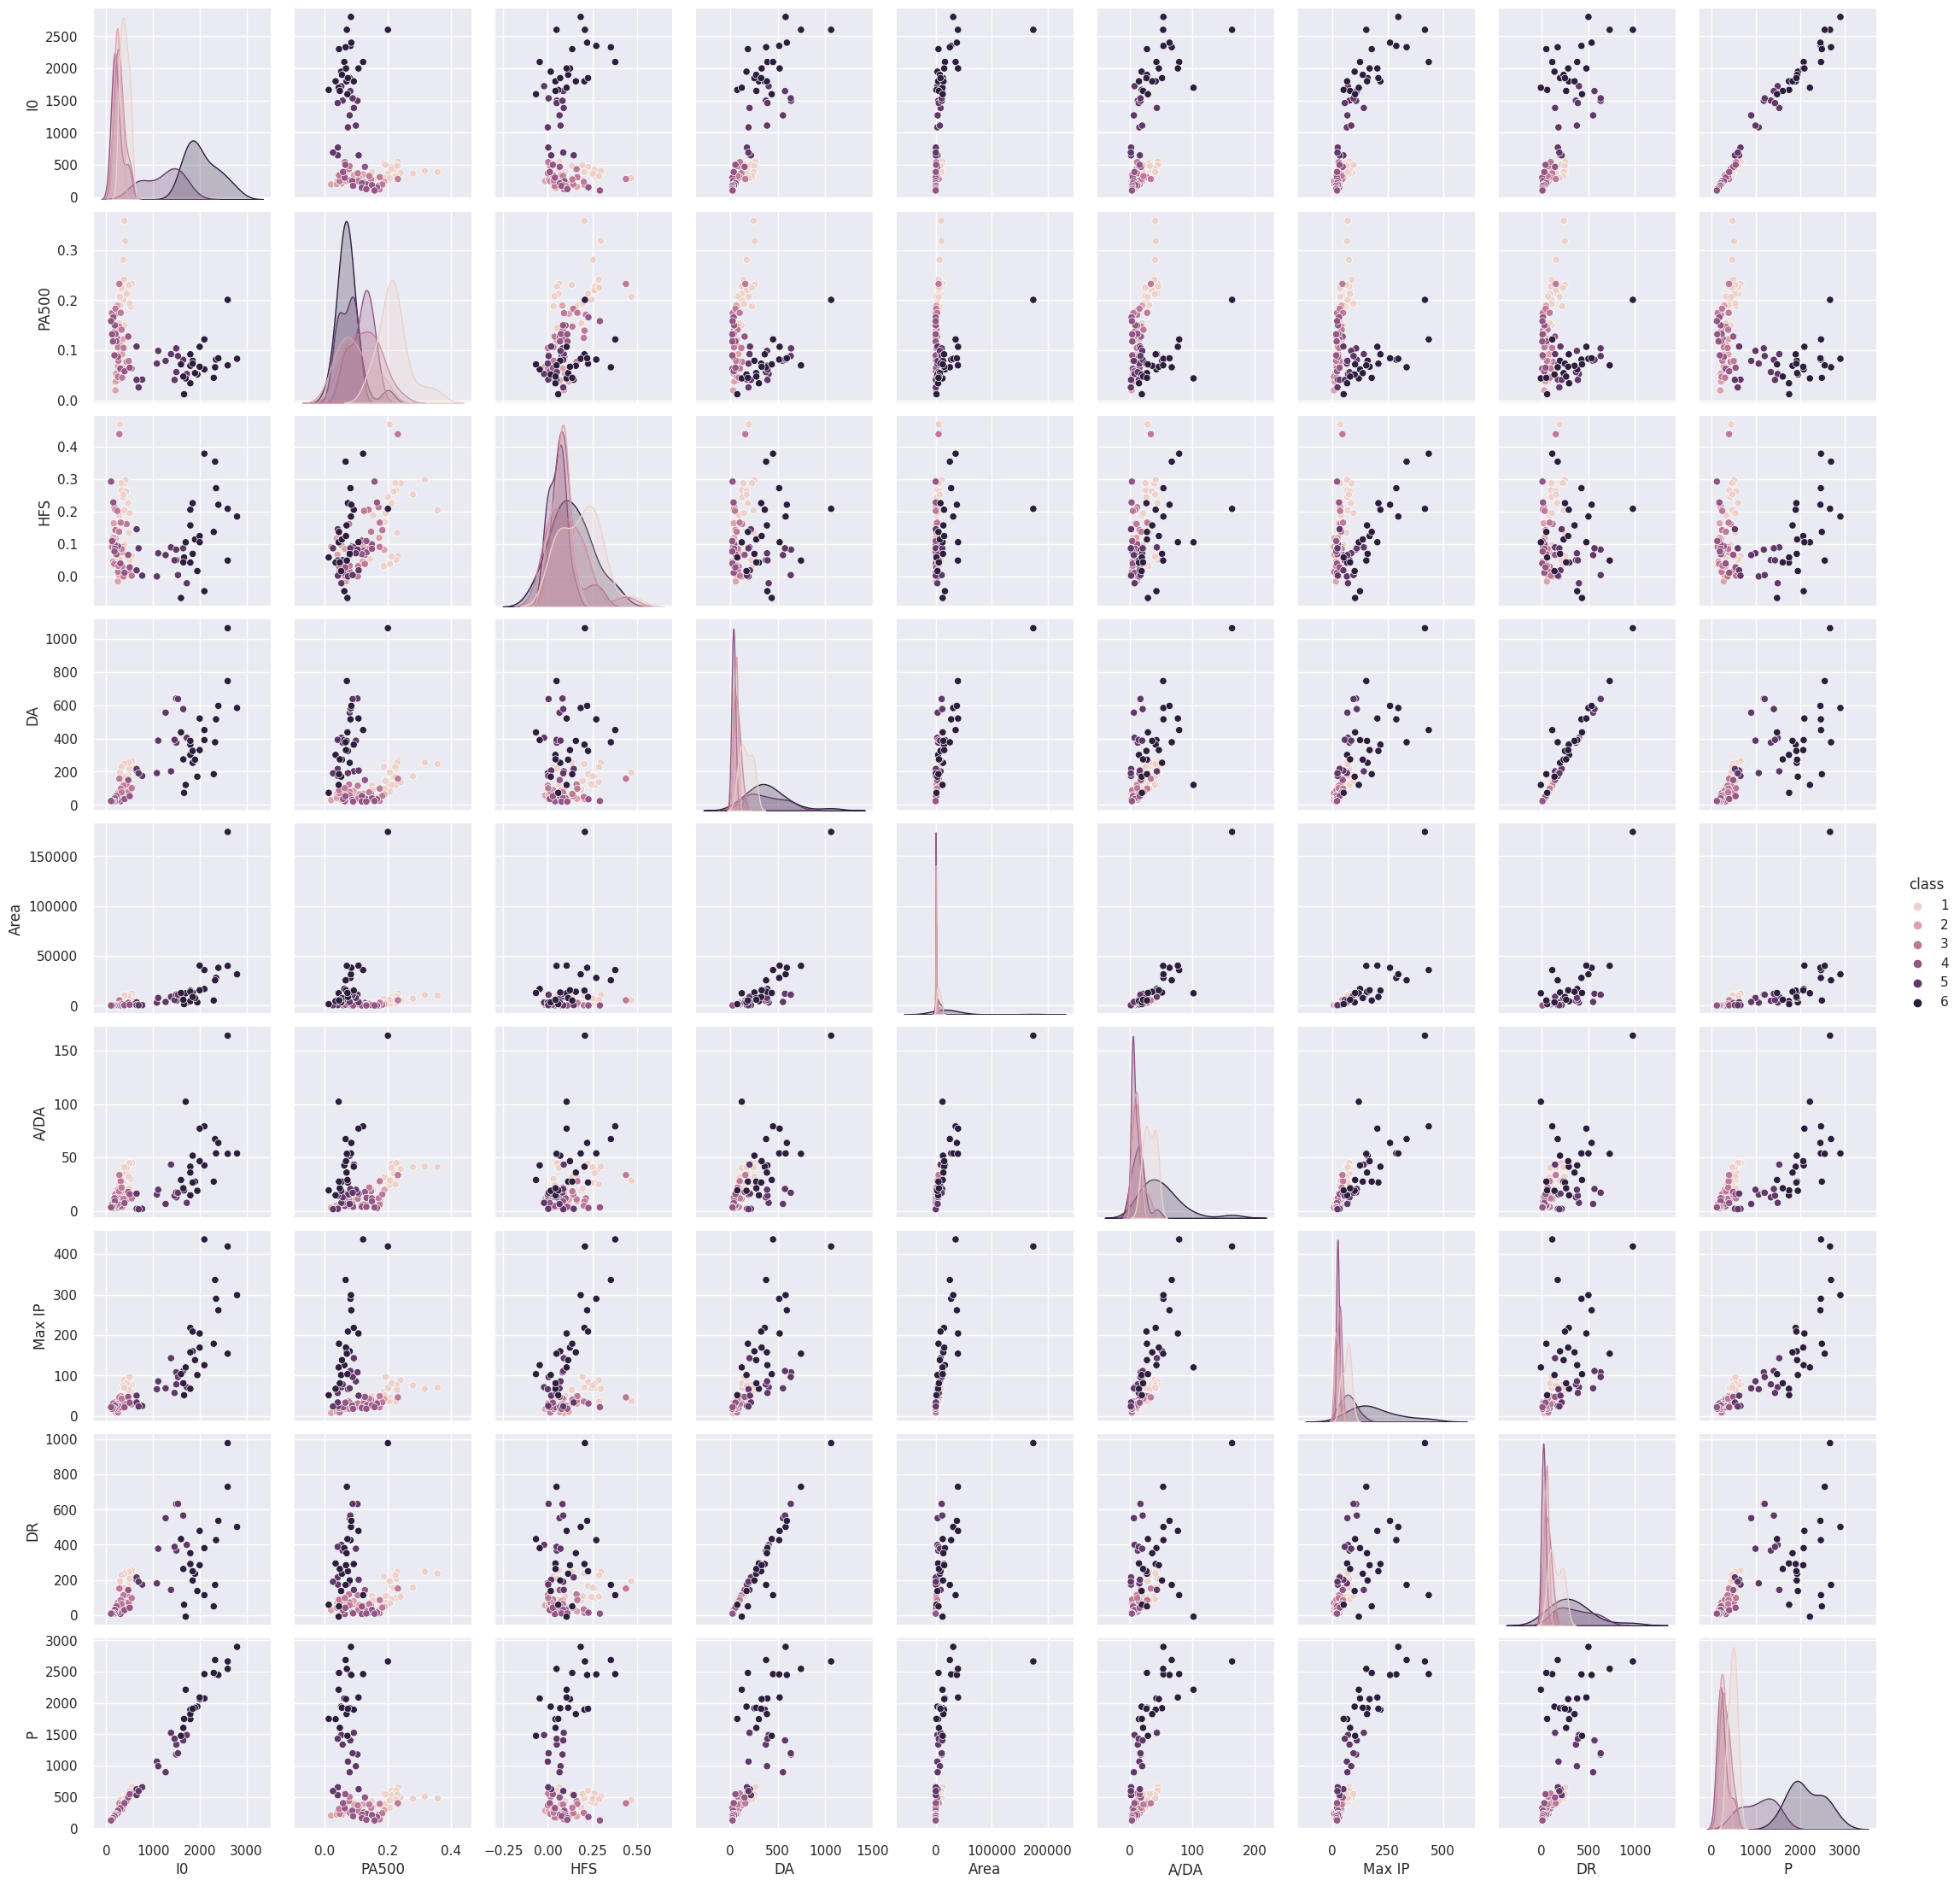

In [27]:
sns.pairplot(df, hue='class')
plt.show()

In [28]:
X = df.drop(columns=['class'])
X.head(10)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,551.879287,0.232478,0.063530,264.804935,11888.391830,44.894903,77.793297,253.785300,656.769449
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
5,389.872978,0.150098,0.097738,118.625814,2475.557078,20.868620,49.757149,107.686164,429.385788
6,290.455141,0.144164,0.053058,74.635067,1189.545213,15.938154,35.703331,65.541324,330.267293
7,275.677393,0.153938,0.187797,91.527893,1756.234837,19.187974,39.305183,82.658682,331.588302
8,470.000000,0.213105,0.225497,184.590057,8185.360837,44.343455,84.482483,164.122511,603.315715
9,423.000000,0.219562,0.261799,172.371241,6108.106297,35.435762,79.056351,153.172903,558.274515


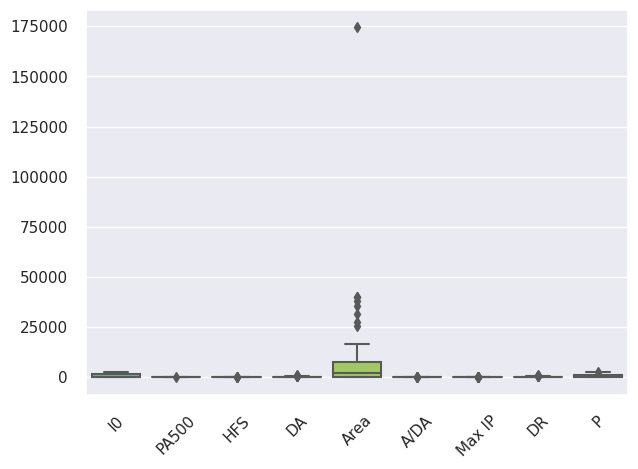

In [29]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

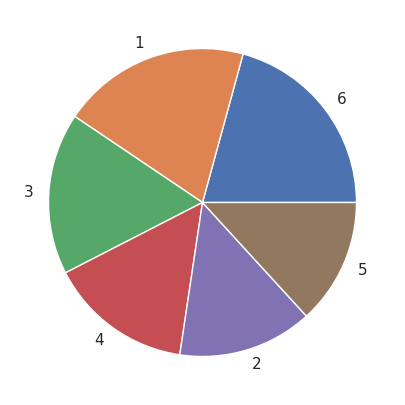

In [30]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()
     

In [31]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
I0,106.0,784.251618,753.950075,103.000000,250.000000,384.936489,1487.989626,2800.000000
PA500,106.0,0.120133,0.068596,0.012392,0.067413,0.105418,0.169602,0.358316
HFS,106.0,0.114691,0.101347,-0.066323,0.043982,0.086568,0.166504,0.467748
DA,106.0,190.568642,190.801448,19.647670,53.845470,120.777303,255.334809,1063.441427
Area,106.0,7335.155161,18580.314212,70.426239,409.647141,2219.581163,7615.204968,174480.476200
A/DA,106.0,23.473784,23.354672,1.595742,8.180321,16.133657,30.953294,164.071543
Max IP,106.0,75.381258,81.345838,7.968783,26.893773,44.216040,83.671755,436.099640
DR,106.0,166.710575,181.309580,-9.257696,41.781258,97.832557,232.990070,977.552367
P,106.0,810.638127,763.019135,124.978561,270.215238,454.108153,1301.559438,2896.582483


In [32]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,-0.345766,0.985996,-0.818664,0.201326,-0.026581,0.276930,-0.187452,0.299396,-0.334219
1,-0.605358,1.563752,1.493038,-0.365533,-0.225601,0.113379,-0.069958,-0.374756,-0.540435
2,-0.309671,1.645558,-0.507207,0.390925,0.246221,0.921566,0.029793,0.482536,-0.202616
3,-0.538725,1.768267,1.700676,-0.278719,-0.104528,0.678651,0.165230,-0.340877,-0.417345
4,-0.561605,1.180285,1.285400,-0.345742,-0.218721,0.123400,-0.074009,-0.348258,-0.508080
5,-0.525568,0.438917,-0.168065,-0.378847,-0.262788,-0.112078,-0.316499,-0.327091,-0.502037
6,-0.658057,0.351998,-0.611026,-0.610500,-0.332331,-0.324193,-0.490086,-0.560643,-0.632557
7,-0.677751,0.495159,0.724778,-0.521543,-0.301686,-0.184382,-0.445597,-0.465784,-0.630817
8,-0.418787,1.361793,1.098526,-0.031483,0.045976,0.897842,0.112415,-0.014342,-0.273004
9,-0.481422,1.456381,1.458432,-0.095827,-0.066354,0.514621,0.045393,-0.075021,-0.332315


In [33]:
observations = list(df.index)
variables = list(df.columns)

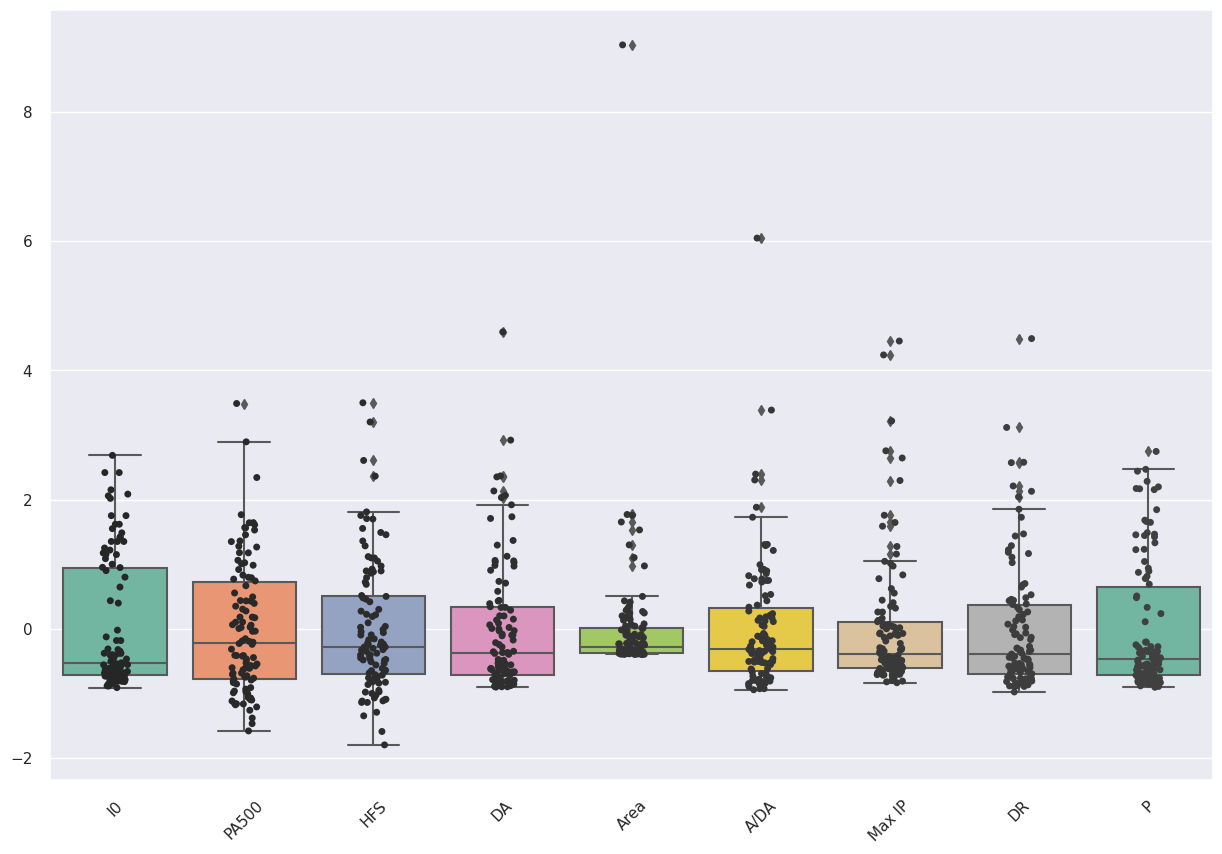

In [34]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

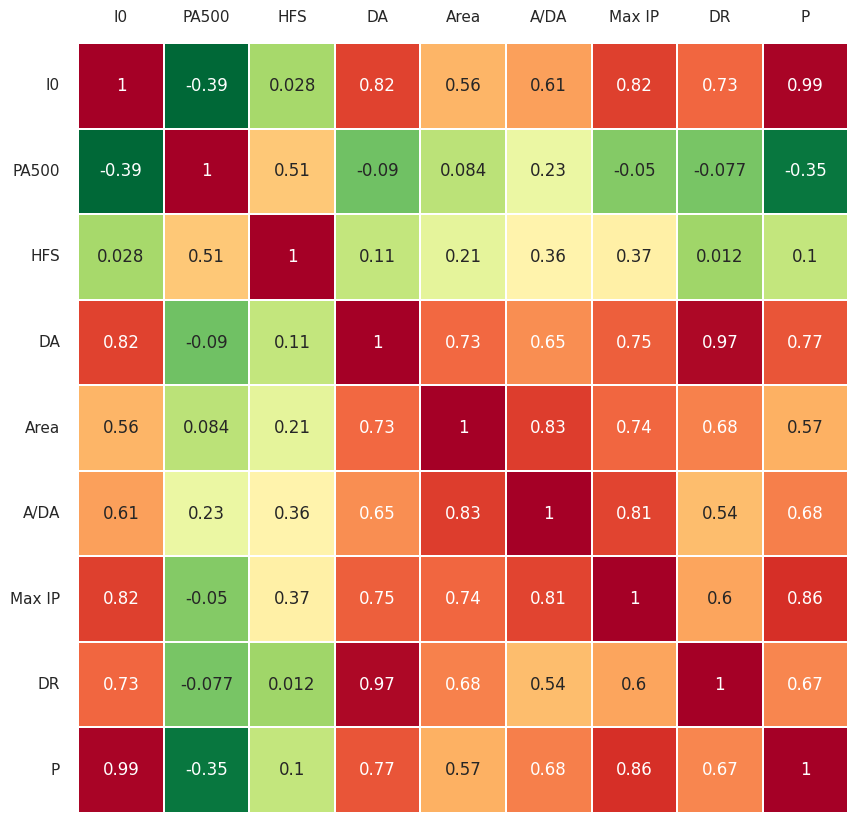

In [35]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, 'Z2')

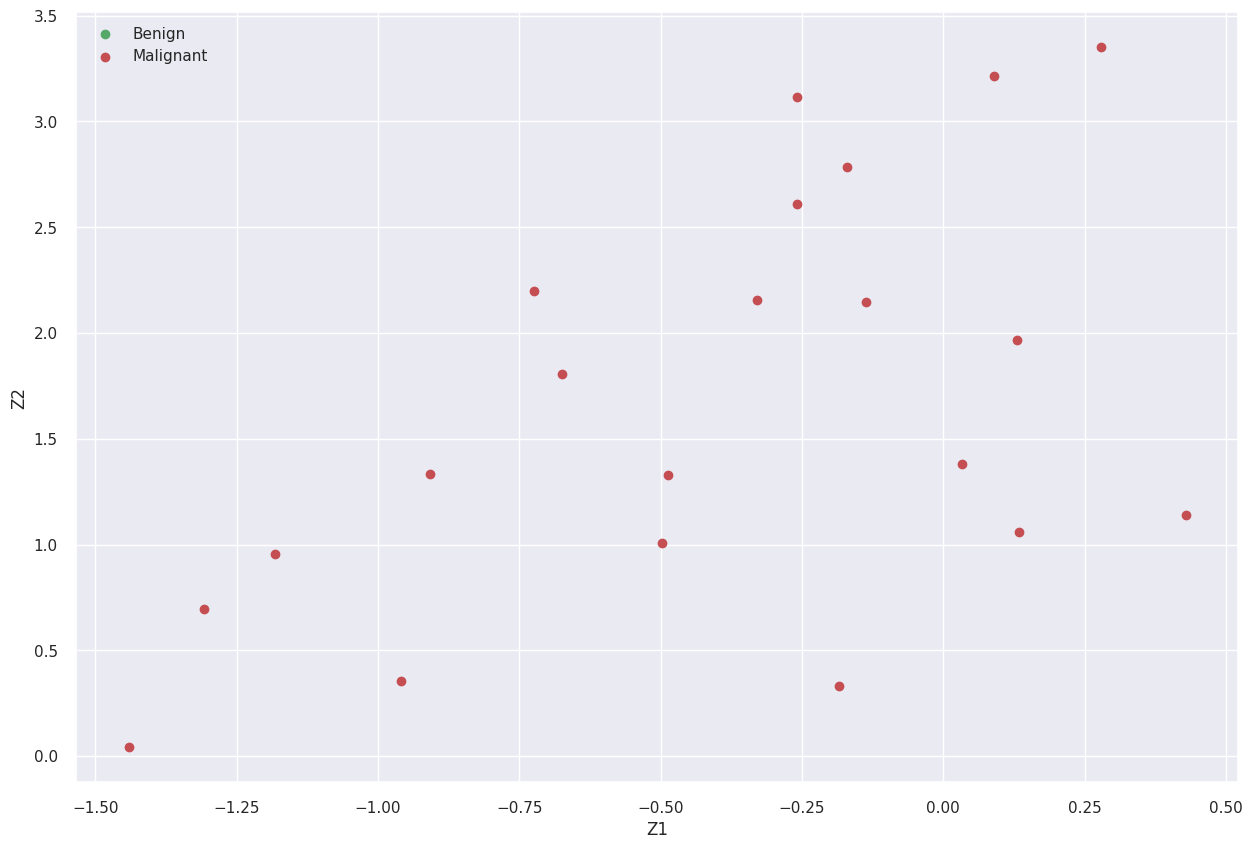

In [36]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

array([[ 0.38744945, -0.23954935, -0.22465384, -0.13166554, -0.25699858,
         0.08100396, -0.38788206, -0.00237137, -0.70825549],
       [-0.04731079,  0.66474199,  0.32695184, -0.09277402, -0.56871173,
        -0.19005279, -0.28239743,  0.03270856,  0.00200142],
       [ 0.09353183,  0.58567756, -0.47590882, -0.44397307,  0.41988891,
         0.21591021, -0.03402799, -0.00683975, -0.02244293],
       [ 0.39524554, -0.05815884,  0.30911394, -0.34000333,  0.05908075,
        -0.07677492,  0.28426849,  0.7340915 ,  0.01268819],
       [ 0.35163773,  0.1670238 ,  0.28635994,  0.476911  ,  0.53416903,
        -0.10563185, -0.48857613,  0.05906012,  0.01784579],
       [ 0.35494151,  0.27590649, -0.01713069,  0.48963972, -0.20900507,
         0.53471086,  0.46491037, -0.04077149, -0.10221951],
       [ 0.392272  ,  0.09826335, -0.30561631,  0.11323685, -0.04148647,
        -0.75044398,  0.33677124, -0.22788832,  0.00279709],
       [ 0.35798091, -0.09249779,  0.49053609, -0.42483434,  0

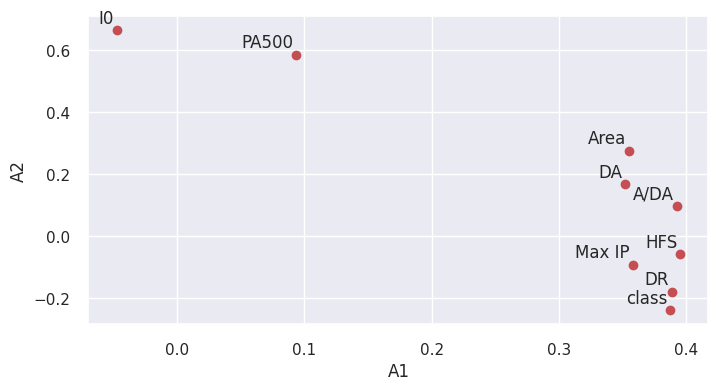

In [37]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

array([5.51516788e+00, 1.82827819e+00, 7.86134008e-01, 5.10767170e-01,
       2.87422355e-01, 1.00325007e-01, 5.36084594e-02, 3.11139439e-03,
       8.99827641e-04])

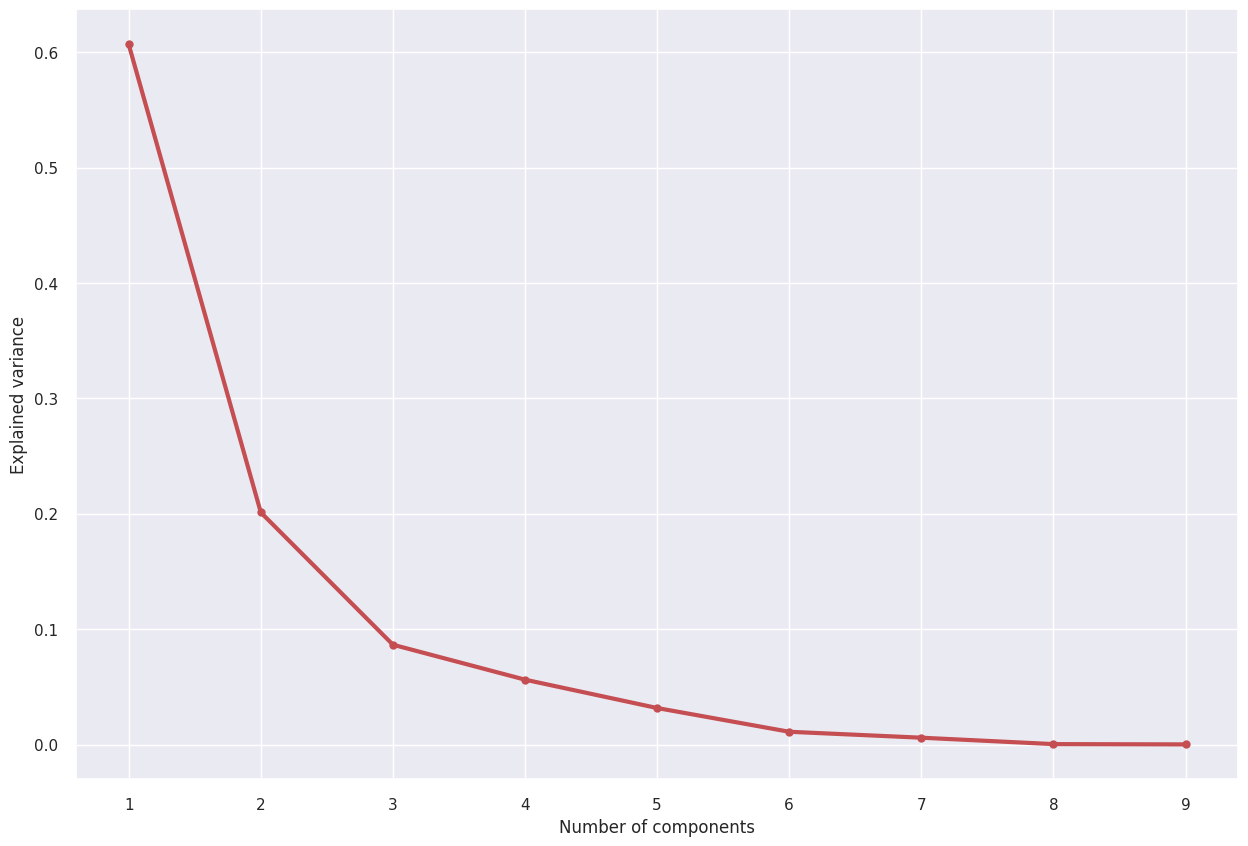

In [38]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

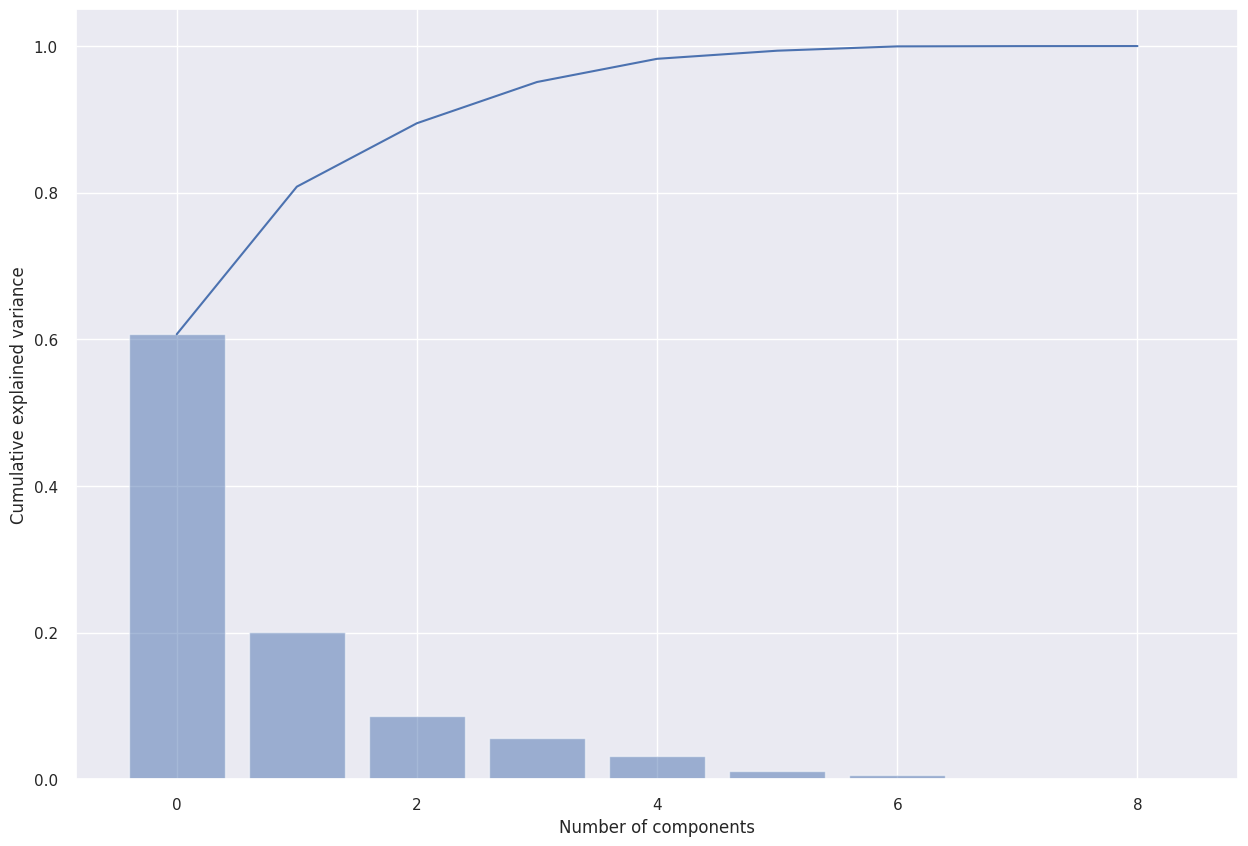

In [39]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
     

In [41]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [43]:
out['PC']

,PC1,PC2,PC3,PC4
0,-0.184901,0.332813,1.151612,0.233277
1,-0.724059,2.198421,-0.230759,-0.489038
2,0.428607,1.138244,1.317555,0.353305
3,-0.258753,2.609076,-0.320861,-0.295306
4,-0.674118,1.805542,-0.255442,-0.378235
...,...,...,...,...
101,4.651588,-0.044148,0.439451,0.625608
102,12.330999,3.220131,3.426435,3.370961
103,1.988616,-2.001716,1.190093,-0.079800
104,1.984934,-1.266948,-2.382438,0.129396


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [98.26%] of the variance'}, xlabel='PC1 (60.7% expl.var)', ylabel='PC2 (20.1% expl.var)'>)

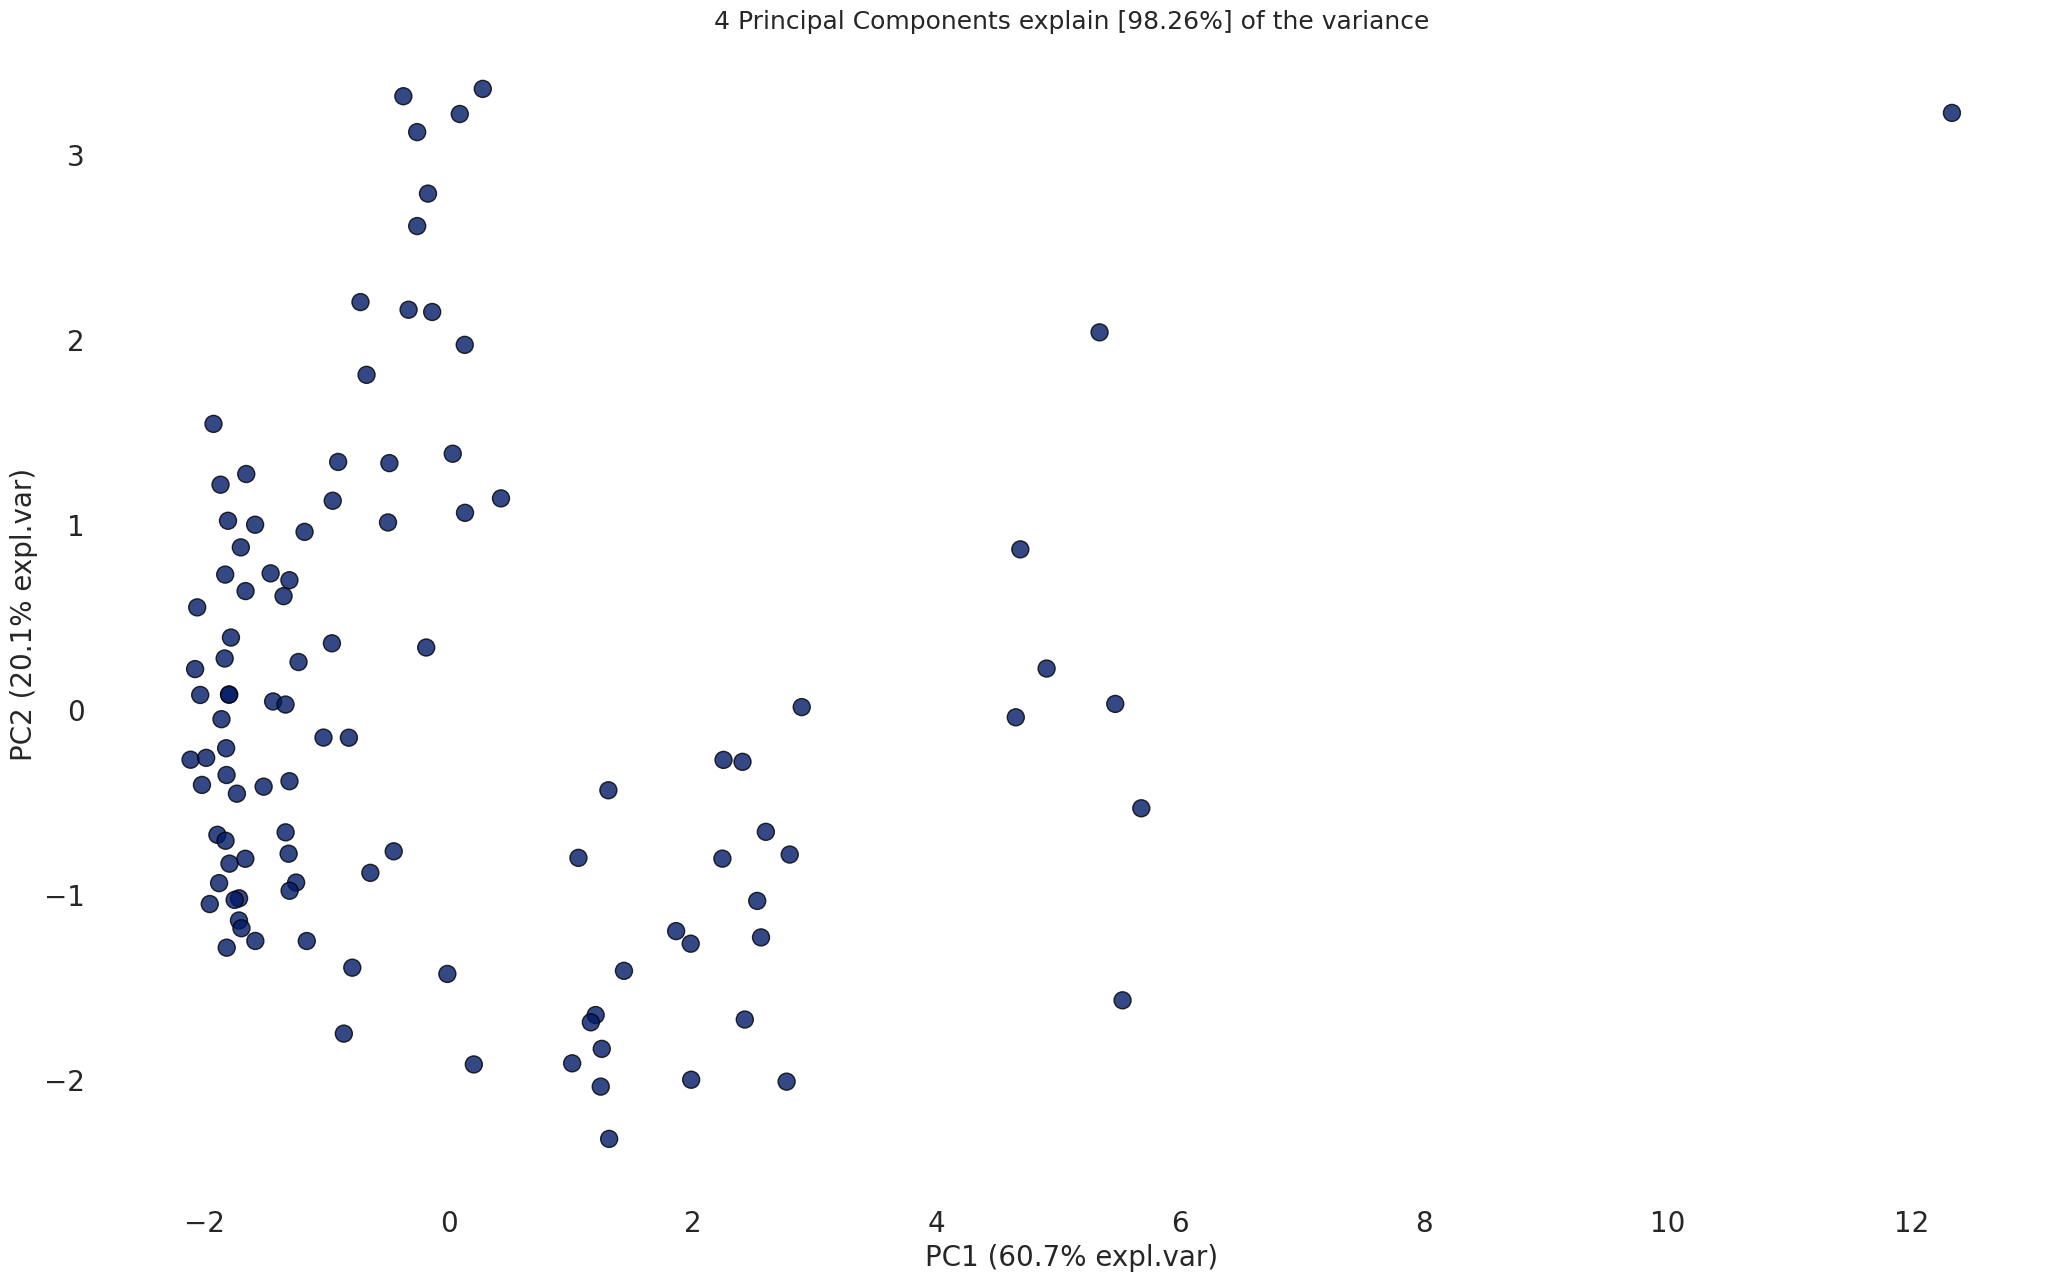

In [44]:
model.scatter(label=True, legend=False)


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


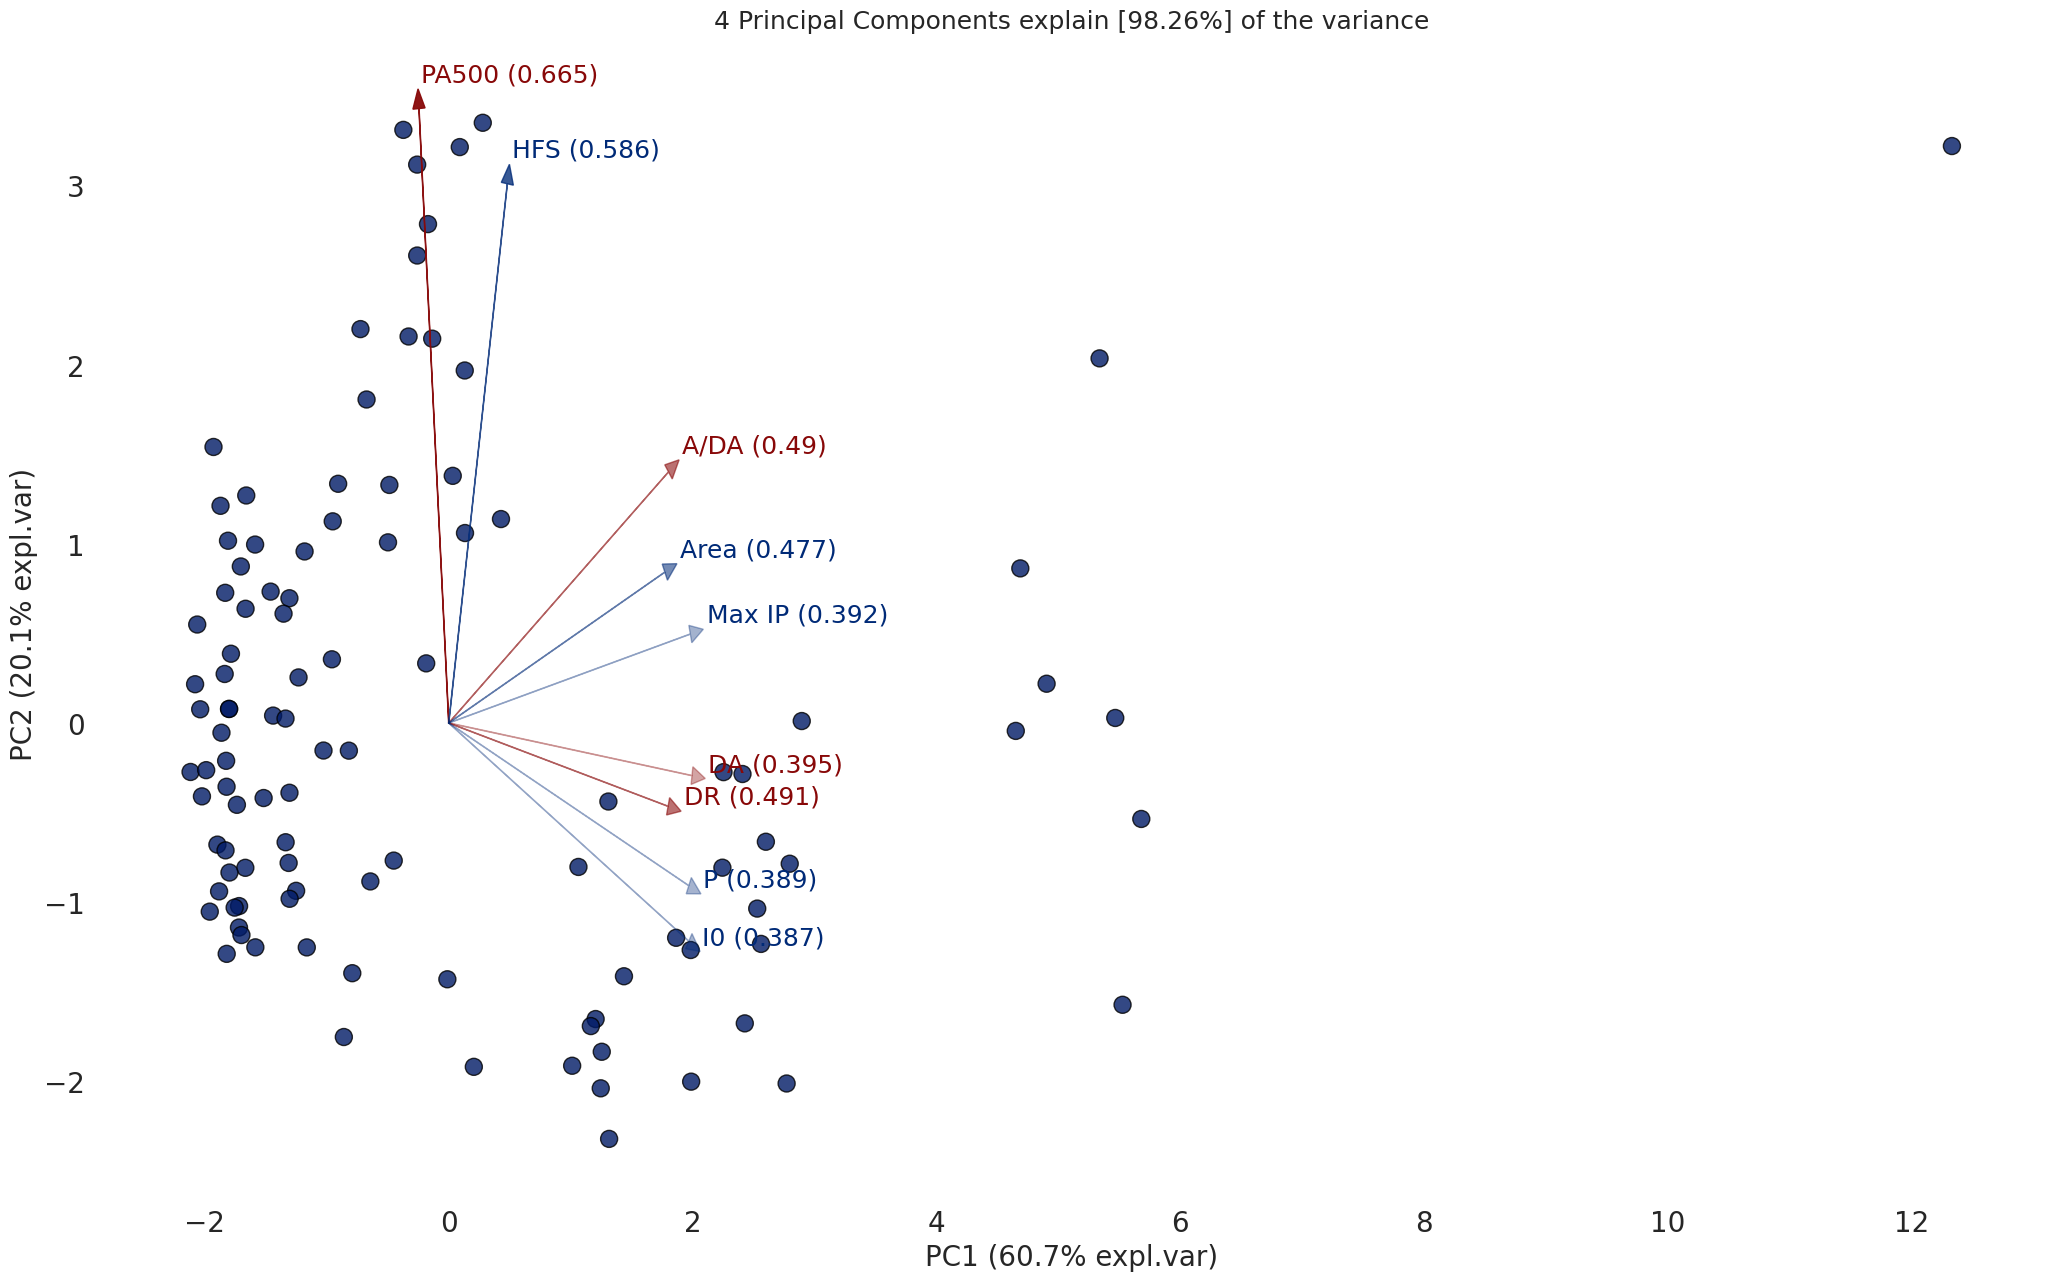

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [98.26%] of the variance'}, xlabel='PC1 (60.7% expl.var)', ylabel='PC2 (20.1% expl.var)'>)

In [45]:
model.biplot(label=False, legend=False)


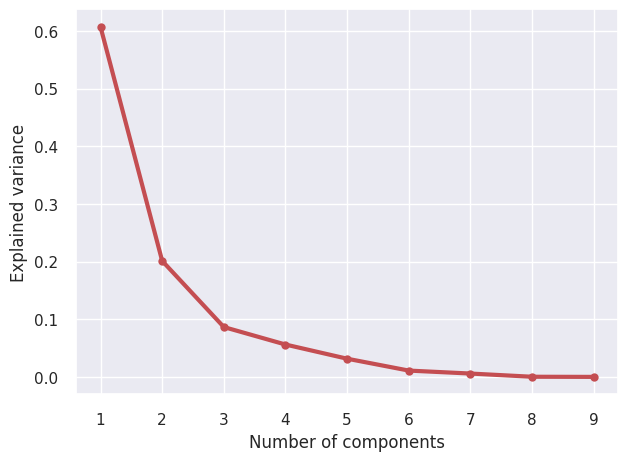

In [46]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

In [47]:
from pycaret.utils import version
version()

'3.0.0'

In [48]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4
I0,0.387449,-0.239549,-0.224654,-0.131666
PA500,-0.047311,0.664742,0.326952,-0.092774
HFS,0.093532,0.585678,-0.475909,-0.443973
DA,0.395246,-0.058159,0.309114,-0.340003
Area,0.351638,0.167024,0.286360,0.476911
A/DA,0.354942,0.275906,-0.017131,0.489640
Max IP,0.392272,0.098263,-0.305616,0.113237
DR,0.357981,-0.092498,0.490536,-0.424834
P,0.388609,-0.179167,-0.322909,-0.029066


In [49]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
     

Data for Modeling: (95, 10)
Unseen Data For Predictions: (11, 10)


In [50]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5"
4,Original data shape,"(95, 10)"
5,Transformed data shape,"(95, 10)"
6,Transformed train set shape,"(66, 10)"
7,Transformed test set shape,"(29, 10)"
8,Numeric features,9
9,Preprocess,True


In [51]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6857,0.5467,0.6857,0.6544,0.6436,0.6143,0.6445,1.1000
lda,Linear Discriminant Analysis,0.6857,0.5486,0.6857,0.6401,0.6440,0.6090,0.6373,0.1590
xgboost,Extreme Gradient Boosting,0.6857,0.5105,0.6857,0.6357,0.6430,0.6110,0.6320,0.6270
nb,Naive Bayes,0.6714,0.5376,0.6714,0.6282,0.6309,0.5917,0.6179,0.0740
rf,Random Forest Classifier,0.6667,0.5362,0.6667,0.6306,0.6323,0.5875,0.6110,0.6660
et,Extra Trees Classifier,0.6214,0.5421,0.6214,0.5905,0.5917,0.5325,0.5495,0.4810
lightgbm,Light Gradient Boosting Machine,0.6119,0.5152,0.6119,0.5635,0.5716,0.5266,0.5556,0.5900
ridge,Ridge Classifier,0.6048,0.0000,0.6048,0.5143,0.5367,0.5171,0.5583,0.0640
dt,Decision Tree Classifier,0.5762,0.4333,0.5762,0.5440,0.5500,0.4807,0.4979,0.0720
gbc,Gradient Boosting Classifier,0.5738,0.5010,0.5738,0.5294,0.5371,0.4816,0.5071,1.5170


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [53]:
# install slim version (default): if you get an error message, run it again:
!pip3 install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

#read cvs file into dataframe
df = pd.read_csv('/content/BreastTissue.csv')
df.head(25)

,class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,1,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,1,551.879287,0.232478,0.063530,264.804935,11888.391830,44.894903,77.793297,253.785300,656.769449
3,1,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,1,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
5,1,389.872978,0.150098,0.097738,118.625814,2475.557078,20.868620,49.757149,107.686164,429.385788
6,1,290.455141,0.144164,0.053058,74.635067,1189.545213,15.938154,35.703331,65.541324,330.267293
7,1,275.677393,0.153938,0.187797,91.527893,1756.234837,19.187974,39.305183,82.658682,331.588302
8,1,470.000000,0.213105,0.225497,184.590057,8185.360837,44.343455,84.482483,164.122511,603.315715
9,1,423.000000,0.219562,0.261799,172.371241,6108.106297,35.435762,79.056351,153.172903,558.274515


In [57]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (95, 10)
Unseen Data For Predictions: (11, 10)


In [ ]:
from pycaret.classification import *
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5"
4,Original data shape,"(106, 10)"
5,Transformed data shape,"(106, 4)"
6,Transformed train set shape,"(74, 4)"
7,Transformed test set shape,"(32, 4)"
8,Numeric features,9
9,Preprocess,True


In [56]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.8036,0.5000,0.5417,0.4792,0.4074,0.4315
1,0.6250,0.8780,0.6250,0.6667,0.6042,0.5556,0.5883
2,0.5000,0.9018,0.5000,0.4167,0.4500,0.3846,0.4003
3,0.2500,0.7500,0.2500,0.1042,0.1458,0.1429,0.1712
4,0.7143,0.9286,0.7143,0.6429,0.6667,0.6500,0.6669
5,0.7143,0.8810,0.7143,0.6429,0.6667,0.6500,0.6669
6,0.7143,0.8048,0.7143,0.5476,0.6095,0.6410,0.6779
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.5714,0.9286,0.5714,0.4286,0.4762,0.4750,0.5007


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [59]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.0000,0.4286,0.4762,0.4048,0.3171,0.3617
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7143,0.8429,0.7143,0.7857,0.7143,0.6585,0.6750
3,0.5714,0.0000,0.5714,0.5238,0.5429,0.4324,0.4451
4,0.5714,0.0000,0.5714,0.6190,0.5476,0.4615,0.5008
5,0.5714,0.8571,0.5714,0.5000,0.4762,0.4878,0.5270
6,0.6667,0.9667,0.6667,0.5833,0.6111,0.6000,0.6211
7,0.8333,0.9333,0.8333,0.7500,0.7778,0.8000,0.8281
8,0.6667,0.8667,0.6667,0.5556,0.5833,0.6000,0.6708


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.0000,0.4286,0.4762,0.4048,0.3000,0.3244
1,1.0000,0.9762,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.5714,0.8190,0.5714,0.5000,0.5238,0.4878,0.5000
3,0.5714,0.0000,0.5714,0.5238,0.5429,0.4324,0.4451
4,0.5714,0.0000,0.5714,0.6190,0.5476,0.4615,0.5008
5,0.7143,0.9048,0.7143,0.5714,0.6190,0.6500,0.6852
6,0.8333,0.9667,0.8333,0.7500,0.7778,0.8000,0.8281
7,1.0000,0.9667,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8333,1.0000,0.8333,0.7500,0.7778,0.8000,0.8281


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

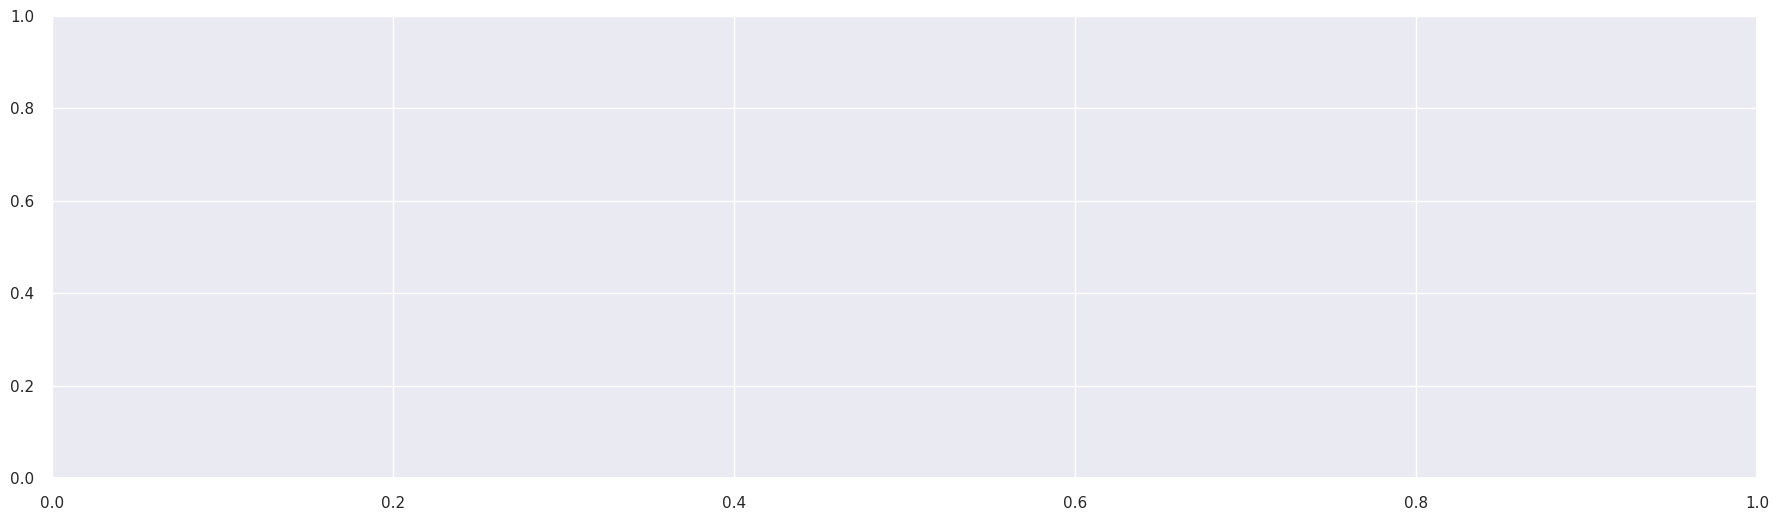

In [70]:
evaluate_model(tuned_lr)

In [65]:
xgboost= create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.0000,0.5714,0.7619,0.5952,0.4750,0.5137
1,0.8571,0.9524,0.8571,0.7857,0.8095,0.8250,0.8464
2,0.4286,0.6571,0.4286,0.3095,0.3524,0.2821,0.2983
3,0.7143,0.0000,0.7143,0.7143,0.7143,0.6316,0.6316
4,0.8571,0.0000,0.8571,0.7619,0.8000,0.8108,0.8346
5,0.4286,0.8286,0.4286,0.3571,0.3810,0.3000,0.3078
6,0.8333,0.9333,0.8333,0.7500,0.7778,0.8000,0.8281
7,0.6667,0.8667,0.6667,0.6667,0.6667,0.6000,0.6000
8,0.6667,0.8667,0.6667,0.5000,0.5556,0.6000,0.6445


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.5714,0.6190,0.6111,0.6745
1,0.7143,0.9524,0.7143,0.7143,0.7143,0.6500,0.6500
2,0.2857,0.6905,0.2857,0.2143,0.2381,0.1250,0.1282
3,0.7143,0.0000,0.7143,0.7143,0.7143,0.6316,0.6316
4,0.8571,0.0000,0.8571,0.9286,0.8571,0.8205,0.8421
5,0.5714,0.9048,0.5714,0.4048,0.4667,0.4615,0.4881
6,0.8333,0.9333,0.8333,0.7500,0.7778,0.8000,0.8281
7,0.8333,0.8667,0.8333,0.7500,0.7778,0.8000,0.8281
8,0.8333,1.0000,0.8333,0.7500,0.7778,0.8000,0.8281


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

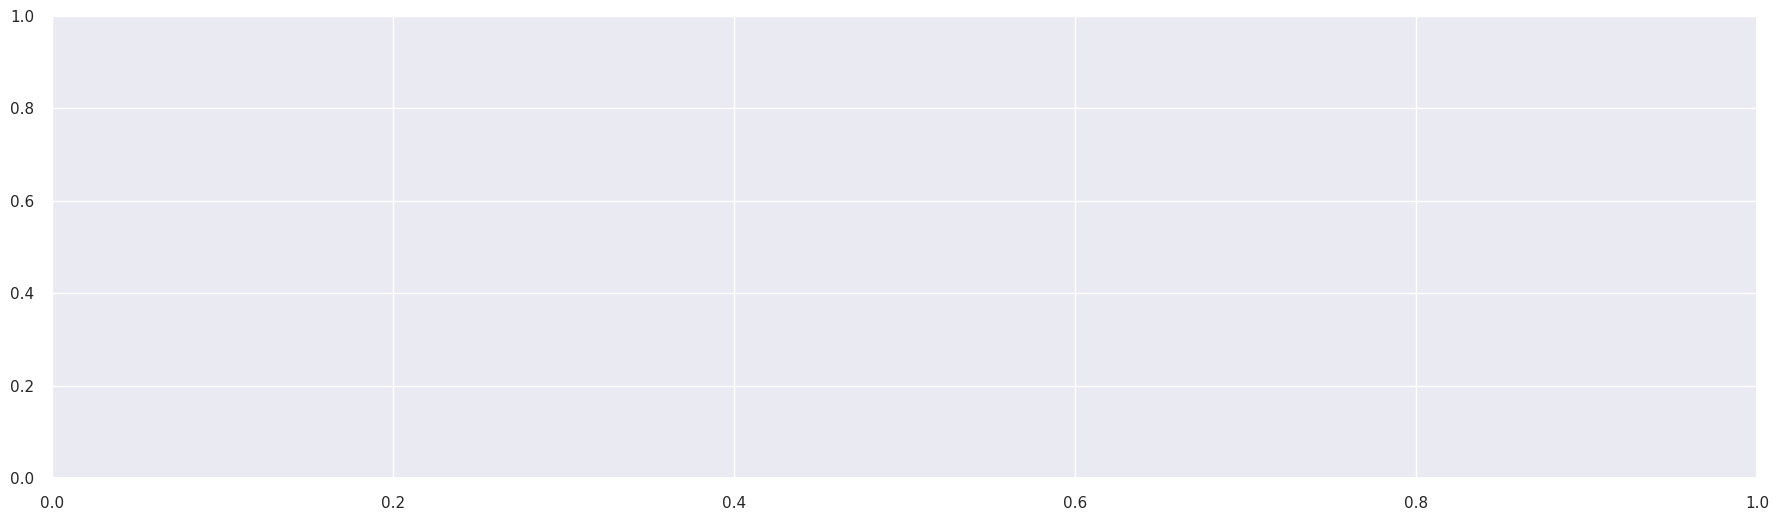

In [71]:
evaluate_model(tuned_xgboost)

In [67]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.9048,0.7381,0.6500,0.7030
1,0.7143,0.9286,0.7143,0.7143,0.7143,0.6500,0.6500
2,0.2857,0.8190,0.2857,0.1429,0.1905,0.0789,0.0896
3,0.7143,0.0000,0.7143,0.7143,0.7143,0.6316,0.6316
4,0.7143,0.0000,0.7143,0.6429,0.6667,0.6585,0.7105
5,0.7143,0.9048,0.7143,0.6429,0.6667,0.6500,0.6669
6,0.8333,0.9000,0.8333,0.7500,0.7778,0.8000,0.8281
7,0.8333,1.0000,0.8333,0.7500,0.7778,0.8000,0.8281
8,0.6667,0.9333,0.6667,0.5833,0.6111,0.6000,0.6211


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [68]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.6190,0.6429,0.6500,0.7233
1,0.7143,0.9286,0.7143,0.7143,0.7143,0.6500,0.6500
2,0.5714,0.8476,0.5714,0.5238,0.5429,0.4615,0.4743
3,0.7143,0.0000,0.7143,0.7143,0.7143,0.6316,0.6316
4,0.7143,0.0000,0.7143,0.6429,0.6667,0.6585,0.7105
5,0.7143,0.8810,0.7143,0.6429,0.6667,0.6500,0.6669
6,0.8333,0.8667,0.8333,0.7500,0.7778,0.8000,0.8281
7,0.8333,1.0000,0.8333,0.7500,0.7778,0.8000,0.8281
8,0.8333,0.9333,0.8333,0.7500,0.7778,0.8000,0.8281


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

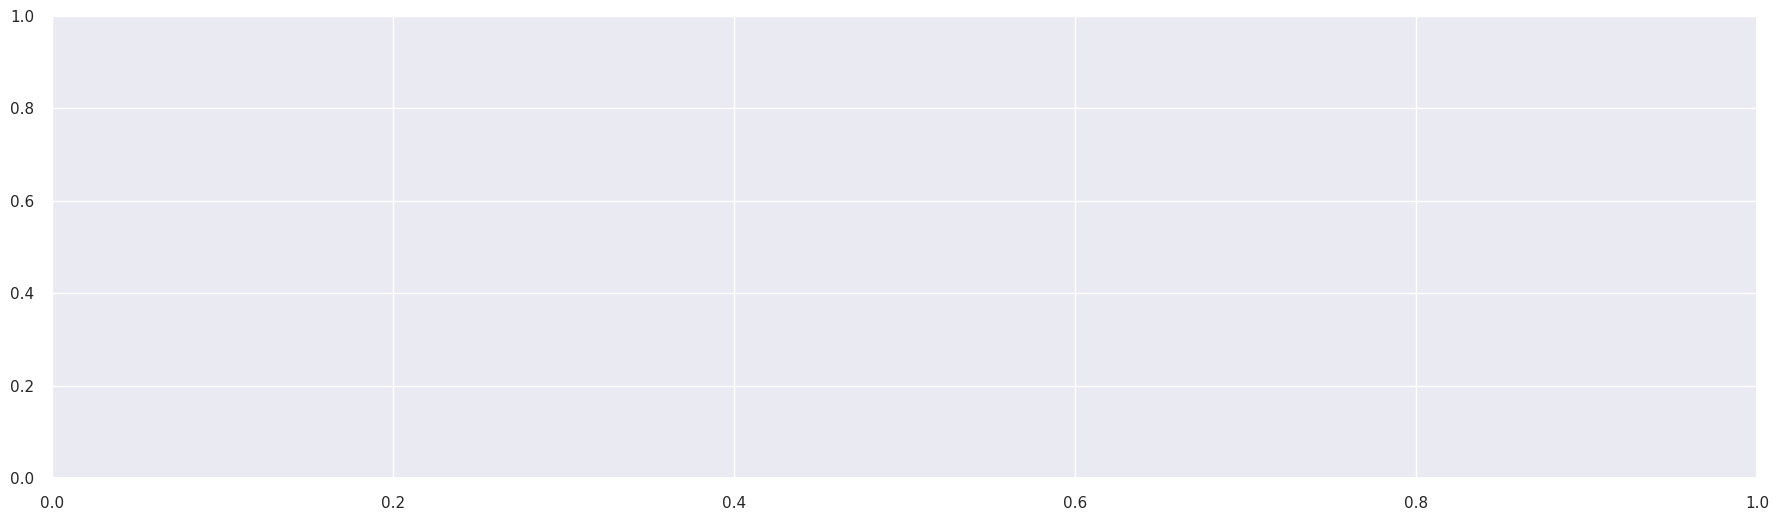

In [72]:
evaluate_model(tuned_lda)

In [69]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7143,0.7619,0.6905,0.6410,0.6955
1,0.7143,0.9524,0.7143,0.7143,0.7143,0.6500,0.6500
2,0.4286,0.7190,0.4286,0.3095,0.3524,0.2821,0.2983
3,0.7143,0.0000,0.7143,0.7143,0.7143,0.6316,0.6316
4,0.8571,0.0000,0.8571,0.7619,0.8000,0.8108,0.8346
5,0.5714,0.9238,0.5714,0.5714,0.5238,0.4878,0.5130
6,0.5000,0.9000,0.5000,0.5000,0.5000,0.4000,0.4140
7,0.6667,0.9000,0.6667,0.6667,0.6667,0.6000,0.6000
8,0.8333,0.9667,0.8333,0.7500,0.7778,0.8000,0.8281


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.8869,0.6250,0.7083,0.6417,0.5385,0.5491
1,0.7500,0.9375,0.7500,0.6667,0.6875,0.7037,0.7606
2,0.7500,0.9018,0.7500,0.6667,0.7000,0.6863,0.7006
3,0.2500,0.8214,0.2500,0.1042,0.1458,0.1429,0.1712
4,0.8571,1.0000,0.8571,0.7857,0.8095,0.8250,0.8464
5,0.7143,0.9286,0.7143,0.5714,0.6190,0.6500,0.6852
6,0.7143,0.9762,0.7143,0.5476,0.6095,0.6410,0.6779
7,0.7143,0.9714,0.7143,0.7143,0.6667,0.6585,0.6925
8,0.8571,0.9762,0.8571,0.7857,0.8095,0.8250,0.8464


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#classification

logisticRegr = LogisticRegression(solver='lbfgs')
scoring=['accuracy']
scores_lr_full_data = cross_validate(logisticRegr, df, Y,cv=5, scoring=scoring)
scores_lr_Z = cross_validate(logisticRegr, Z, Y,cv=5, scoring=scoring)
scores_lr_Z12 = cross_validate(logisticRegr, Z[:,:2], Y,cv=5, scoring=scoring)

gnb = GaussianNB()
scores_gnb_full_data = cross_validate(gnb, df, Y,cv=5, scoring=scoring)
scores_gnb_Z = cross_validate(gnb, Z, Y,cv=5, scoring=scoring)
scores_gnb_Z12 = cross_validate(gnb, Z[:,:2], Y,cv=5, scoring=scoring)

scores_dict={}
for i in ['fit_time','test_accuracy']:
  scores_dict["lr_full_data " + i ]=scores_lr_full_data[i]
  scores_dict["lr_Z  " + i ]=scores_lr_Z[i]
  scores_dict["lr_Z12 " + i ]=scores_lr_Z12[i]
  scores_dict["gnb_full_data " + i ]=scores_gnb_full_data[i]
  scores_dict["gnb_Z " + i ]=scores_gnb_Z[i]
  scores_dict["gnb_Z12 " + i ]=scores_gnb_Z12[i]

scores_data=pd.DataFrame(scores_dict)
print(scores_data)

   lr_full_data fit_time  lr_Z  fit_time  lr_Z12 fit_time  \
0               0.029013        0.023066         0.009399   
1               0.030611        0.011999         0.009122   
2               0.048657        0.014724         0.015438   
3               0.031848        0.024994         0.020310   
4               0.027922        0.009318         0.008828   

   gnb_full_data fit_time  gnb_Z fit_time  gnb_Z12 fit_time  \
0                0.003430        0.001283          0.004317   
1                0.003013        0.001534          0.008445   
2                0.002908        0.001276          0.005013   
3                0.003576        0.001397          0.001551   
4                0.003089        0.001358          0.001227   

   lr_full_data test_accuracy  lr_Z  test_accuracy  lr_Z12 test_accuracy  \
0                    0.590909             0.681818              0.681818   
1                    0.571429             0.571429              0.571429   
2                    0.523

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8333,0.7500,0.7500,0.7083,0.6863,0.7317
1,0.7500,0.8452,0.7500,0.8125,0.7500,0.6981,0.7115
2,0.5000,0.6905,0.5000,0.3125,0.3750,0.3846,0.4280
3,0.2500,0.5714,0.2500,0.0875,0.1250,0.1429,0.1903
4,0.8571,0.9167,0.8571,0.7857,0.8095,0.8250,0.8464
5,0.7143,0.8333,0.7143,0.6190,0.6429,0.6500,0.7050
6,0.7143,0.8167,0.7143,0.5476,0.6095,0.6410,0.6779
7,0.7143,0.8167,0.7143,0.5476,0.6095,0.6410,0.6779
8,0.7143,0.8333,0.7143,0.5714,0.6190,0.6500,0.6852


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.7530,0.6250,0.6250,0.6250,0.5472,0.5577
1,0.7500,0.8765,0.7500,0.6250,0.6667,0.7037,0.7452
2,0.7500,0.9182,0.7500,0.7500,0.7083,0.6863,0.7317
3,0.2500,0.5595,0.2500,0.1042,0.1458,0.1273,0.1431
4,0.8571,0.9167,0.8571,0.7857,0.8095,0.8250,0.8464
5,0.5714,0.8452,0.5714,0.4048,0.4524,0.4750,0.5311
6,0.8571,1.0000,0.8571,0.7857,0.8095,0.8250,0.8464
7,0.7143,0.8690,0.7143,0.6429,0.6667,0.6500,0.6669
8,0.7143,1.0000,0.7143,0.6429,0.6667,0.6500,0.6669


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.8943,0.5000,0.5000,0.4583,0.4182,0.4511
1,0.7500,0.8869,0.7500,0.6667,0.6875,0.7037,0.7606
2,0.5000,0.7634,0.5000,0.2917,0.3667,0.3846,0.4089
3,0.2500,0.7143,0.2500,0.1500,0.1667,0.1111,0.1427
4,0.8571,0.8476,0.8571,0.7619,0.8000,0.8205,0.8433
5,0.5714,0.8095,0.5714,0.4048,0.4524,0.4750,0.5311
6,0.4286,0.8548,0.4286,0.4643,0.3905,0.3171,0.3753
7,0.5714,0.8690,0.5714,0.6190,0.5476,0.4878,0.5270
8,0.5714,0.9643,0.5714,0.4286,0.4762,0.4750,0.5007


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7530,0.5000,0.6250,0.5417,0.3962,0.4038
1,0.8750,0.9375,0.8750,0.9375,0.8750,0.8491,0.8654
2,0.6250,0.7872,0.6250,0.4583,0.5125,0.5472,0.6063
3,0.2500,0.6726,0.2500,0.1146,0.1500,0.0943,0.1125
4,0.8571,0.8857,0.8571,0.7619,0.8000,0.8205,0.8433
5,0.5714,0.7976,0.5714,0.4286,0.4762,0.4750,0.5007
6,0.5714,0.8571,0.5714,0.6190,0.5476,0.4878,0.5270
7,0.5714,0.8214,0.5714,0.6429,0.5714,0.4878,0.5130
8,0.5714,0.7262,0.5714,0.4286,0.4762,0.4750,0.5007


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

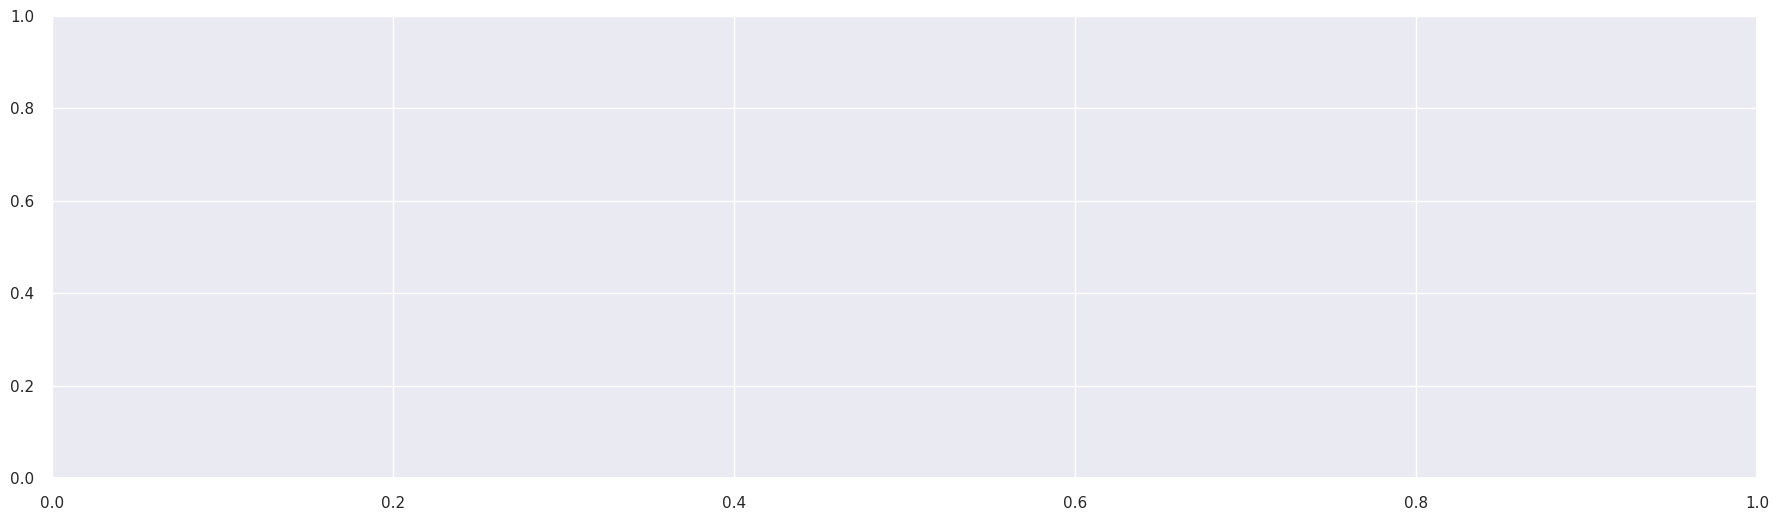

In [ ]:
evaluate_model(tuned_knn)

In [77]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)
     

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5"
4,Original data shape,"(106, 10)"
5,Transformed data shape,"(106, 4)"
6,Transformed train set shape,"(74, 4)"
7,Transformed test set shape,"(32, 4)"
8,Numeric features,9
9,Preprocess,True


In [75]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6857,0.5467,0.6857,0.6544,0.6436,0.6143,0.6445,0.7190
lda,Linear Discriminant Analysis,0.6857,0.5486,0.6857,0.6401,0.6440,0.6090,0.6373,0.1790
xgboost,Extreme Gradient Boosting,0.6857,0.5105,0.6857,0.6357,0.6430,0.6110,0.6320,0.1400
nb,Naive Bayes,0.6714,0.5376,0.6714,0.6282,0.6309,0.5917,0.6179,0.2020
rf,Random Forest Classifier,0.6667,0.5362,0.6667,0.6306,0.6323,0.5875,0.6110,0.2600
et,Extra Trees Classifier,0.6214,0.5421,0.6214,0.5905,0.5917,0.5325,0.5495,0.2660
lightgbm,Light Gradient Boosting Machine,0.6119,0.5152,0.6119,0.5635,0.5716,0.5266,0.5556,0.2660
ridge,Ridge Classifier,0.6048,0.0000,0.6048,0.5143,0.5367,0.5171,0.5583,0.0950
dt,Decision Tree Classifier,0.5762,0.4333,0.5762,0.5440,0.5500,0.4807,0.4979,0.2110
gbc,Gradient Boosting Classifier,0.5738,0.5010,0.5738,0.5294,0.5371,0.4816,0.5071,0.9760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [76]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3750,0.8274,0.3750,0.5000,0.4167,0.2593,0.2746
1,0.7500,0.8780,0.7500,0.6667,0.6875,0.7037,0.7606
2,0.7500,0.9821,0.7500,0.6667,0.7000,0.6863,0.7006
3,0.3750,0.7738,0.3750,0.3750,0.3333,0.2727,0.3067
4,0.7143,0.8810,0.7143,0.7143,0.7143,0.6500,0.6500
5,0.8571,0.9762,0.8571,0.7857,0.8095,0.8250,0.8464
6,0.4286,0.8333,0.4286,0.2381,0.3000,0.2821,0.3175
7,0.8571,0.9762,0.8571,0.9286,0.8571,0.8293,0.8500
8,0.8571,1.0000,0.8571,0.7857,0.8095,0.8250,0.8464


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [79]:
tuned_best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

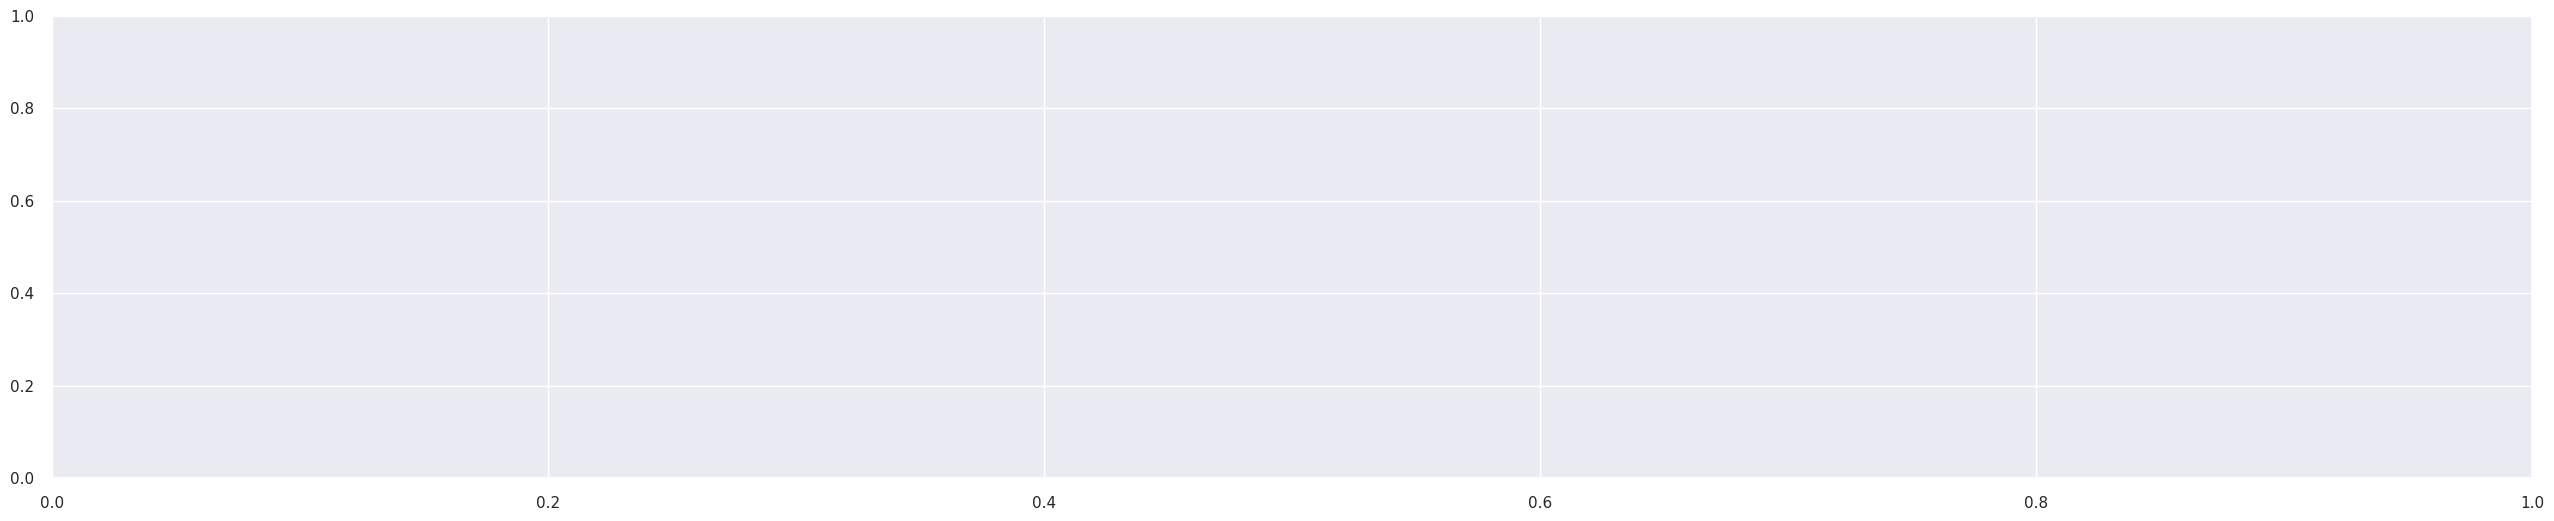

In [80]:
evaluate_model(tuned_best_model_pca)

In [ ]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [ ]:
# !pip install scikit-learn==0.23.2
!pip3 install pycaret==2.3.6
!pip install pycaret[analysis]
!pip install shap
#from pycaret.utils import enable_colab


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 16.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 7.9 MB/s eta 0:00:00
  Using cached mlflow-2.3.1-py3-none-any.whl (17.7 MB)
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess,

In [81]:
lr_pca = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.8274,0.5000,0.6250,0.5417,0.3962,0.4038
1,0.7500,0.8780,0.7500,0.6667,0.6875,0.7037,0.7606
2,0.7500,0.9613,0.7500,0.6667,0.7000,0.6863,0.7006
3,0.2500,0.7738,0.2500,0.3125,0.2500,0.1273,0.1498
4,0.7143,0.9048,0.7143,0.7143,0.7143,0.6500,0.6500
5,0.8571,0.9762,0.8571,0.7857,0.8095,0.8250,0.8464
6,0.4286,0.8333,0.4286,0.2381,0.3000,0.2821,0.3175
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8571,1.0000,0.8571,0.7857,0.8095,0.8250,0.8464


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [83]:
tuned_lr_pca = tune_model(lr_pca)
     

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3750,0.8274,0.3750,0.5000,0.4167,0.2593,0.2746
1,0.7500,0.8780,0.7500,0.6667,0.6875,0.7037,0.7606
2,0.7500,0.9821,0.7500,0.6667,0.7000,0.6863,0.7006
3,0.3750,0.7738,0.3750,0.3750,0.3333,0.2727,0.3067
4,0.7143,0.8810,0.7143,0.7143,0.7143,0.6500,0.6500
5,0.8571,0.9762,0.8571,0.7857,0.8095,0.8250,0.8464
6,0.4286,0.8333,0.4286,0.2381,0.3000,0.2821,0.3175
7,0.8571,0.9762,0.8571,0.9286,0.8571,0.8293,0.8500
8,0.8571,1.0000,0.8571,0.7857,0.8095,0.8250,0.8464


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
